LINK TO GITHUB: https://github.com/BlakePR/LinAlgGroupHw

Setup:
Consider the 1-d boundary value problem from fluid dynamics:
$-u''(x)+V(x)u'(x)=f(x),x \in [0,1]$ <br>
$u(0) = u(1) = 1$ <br>
and we will set: <br>
V(x) = $\gamma$ <br>
f(x) = 1

Part 1: Problem formulation: <br>
a: write this as a variational problem: $A(u,\phi)=F(\phi)$
for some test function $\phi$ <br>


Let $V(x)=\gamma$ and $f(x)=1$ $$-u^{''}(x)+V(x)u^{'}(x)=f(x),x\in[0,1]$$ $$u(0)=u(1)=0$$
$-u^{''}+\gamma u^{'}=1$ and multiply through by the test function $\phi(x)$ to get: 
$$-\phi*u^{"}+\phi*\gamma u^{'}=\phi$$
Next we Integrate over the domain $[0,1]$. This will give $$ -\int_{0}^{1} \phi*u^{"}dx+\int_{0}^{1} \gamma*\phi*u^{'}dx=\int_{0}^{1} \phi dx$$ In the term with the double derivative, we integrate by parts and set the boundary term equal to 0 (assuming $\phi(x)$ follows the same boundary conditions as u(x)). This gives us: $$ -\int_{0}^{1} \phi{'}*u^{'}dx+\int_{0}^{1} \gamma*\phi*u^{'}dx=\int_{0}^{1} \phi dx$$ Per the Galerkin method of finite element analysis, let us discretize our test function $\phi$.  $$ -\int_{0}^{1} \phi_i{'}*u^{'}dx+\int_{0}^{1} \gamma*\phi_i*u^{'}dx=\int_{0}^{1} \phi_i dx$$
Our boundary value problem is now a variational problem of the form: $$A(u,\phi) = F(\phi)$$ 


b: Take $\phi_i$ to be the hat functions discussed in class and approximate u(x) as a linear combination of these basis vectors: $u(x)=\sum_i u_i \phi_i(x)$. Show that part (a) becomes a linear algebra problem of the form Ax=b.
Derive expressions for the matrix A and vector b.
Show $A_{ji} = A(\phi_j,\phi_i)$ and can be writte as the sum of two matrices A = A<sub>1</sub> + A<sub>2</sub> where A<sub>1</sub> and A<sub>2</sub> corresopond to the first two terms on the left hand side of the ODE.


Using the assumption above: $u(x)$ as a linear combination of the discretized test function: $$u(x)=\sum_{j=0}^{\infty} C_{j}*\phi(x)$$ Then calculating the derivative and substituting it in: $$u^{'}(x)=(\sum_{j=0}^{\infty} C_{j}*\phi(x))^{'}=u^{'}(x)=\sum_{j=0}^{\infty} C_{j}*(\phi(x))^{'}$$
$$\int_{0}^{1} (\phi_{i}(x))^{'}*\sum_{j=0}^{\infty} C_{j}*(\phi_{j}(x))^{'}dx+\gamma*\int_{0}^{1} (\phi_{i}(x))*\sum_{j=0}^{\infty} C_{j}*(\phi_{j}(x))^{'}dx = -\int_{0}^{1} \phi_{j} dx$$
We can factor out all the coefficents of $C_{j}$ to get the following:
$$\sum_{j=0}^{\infty} C_{j}(\int_{0}^{1} (\phi_{i}(x))^{'}*(\phi_{j}(x))^{'}dx+\gamma*\int_{0}^{1} (\phi_{i}(x))*(\phi_{j}(x))^{'}dx)= -\int_{0}^{1} \phi_{j} dx$$ 
We can define $x=\sum_{j=0}^{\infty} C_{j}$, $A_{1}=\int_{0}^{1} (\phi_{i}(x))^{'}*(\phi_{j}(x))^{'}dx$ 
 and  $A_{2}=\gamma*\int_{0}^{1} (\phi_{i}(x))*(\phi_{j}(x))^{'}dx$
 and finally $$b_{j}=\int_{0}^{1} \phi_{j} dx$$ Let us sum up $A_{1} $ and $A_{2} $ to get $$A_{1}+A_{2} =A$$

$$A_{1}[i,i]=2(n+1)$$

$$A_{1}[i,i+1]=A_{1}[i+1,i]=-1(n+1)$$

$$A_2[i,i+1]=-A_{2}[i+1,i]=0.5*\gamma*(n+1)$$

c: Implement a routine that will return A as a sparse matrix and b given n and $\gamma$

In [2]:
import MatGenerator as mg

print(mg.generateA(4,1).todense())
print(mg.generateB(4))

[[10.  -4.5  0.   0. ]
 [-5.5 10.  -4.5  0. ]
 [ 0.  -5.5 10.  -4.5]
 [ 0.   0.  -5.5 10. ]]
[[0.2]
 [0.2]
 [0.2]
 [0.2]]


Part 2: implement GMRES algorithm
signature mygmres(l,b,x0,n,M,A)
returns solution of Ax=b with initial iterate x0
n is the dimension of the problem, A is nxn, M is nxn tha defines inner product use for calculateing vector norms (and error). Github, commits from all group members

Part 3: Solving the FEM problem <br>
use GMRES to solve for cases V(x) = 1 and V(x) = n+1 <br>
using M as the identity matrix. for each case, run with n=12,32,64,128 and l=2,4,8,16,32,64, increasing l until the error (norm of residual divided by n) is below 10<sup>-6</sup><br>
plot the most accurate solution (as a function of x) as well as the error vs functions of n and l

Text(0, 0.5, 'U')

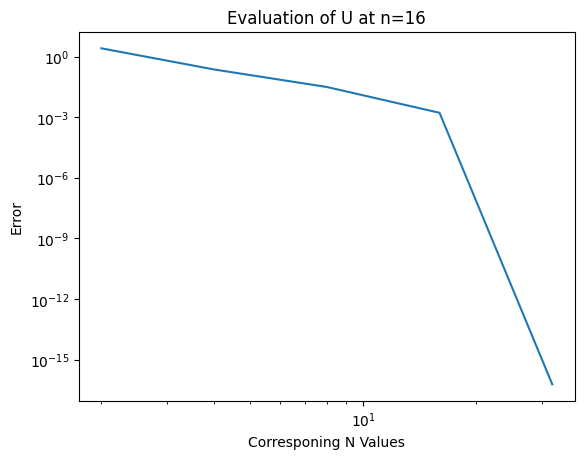

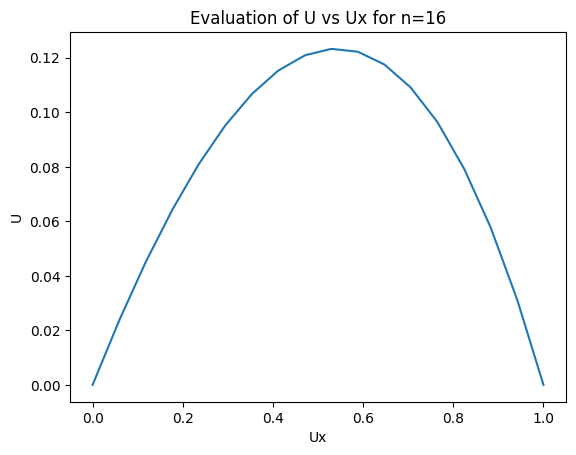

In [10]:
import MatGenerator as mg
reload(mg)
n=16
A = mg.generateA(n,1.)
B = mg.generateB(n)
import GMRES as GM
from importlib import reload
reload(GM)
import numpy as np

alg = GM.gmres()
x0 = np.zeros((n,1))
x0[5,0] = 1
x = alg.mygmres(n,B, x0,n,np.eye(n),A)
err = alg.errors
n=[2**(i+1) for i in range(len(err))]


import matplotlib.pyplot as plt
plt.figure()
plt.loglog(n,err)
plt.title("Evaluation of U at n=16")
plt.xlabel("Corresponing N Values")
plt.ylabel("Error")

plt.figure()
x,y = alg.sol_to_xy()
plt.plot(x,y)
plt.title("Evaluation of U vs Ux for n=16")
plt.xlabel("Ux")
plt.ylabel("U")



Text(0, 0.5, 'U')

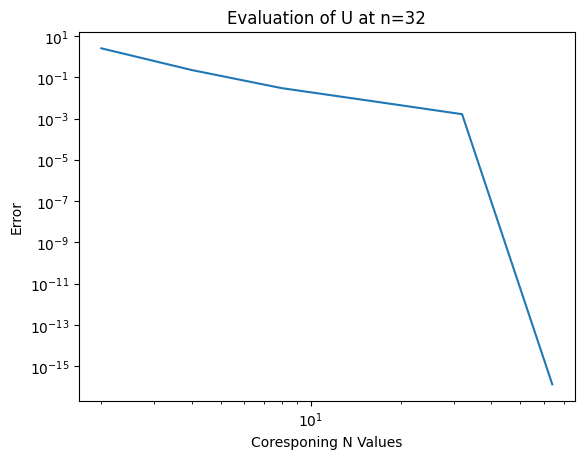

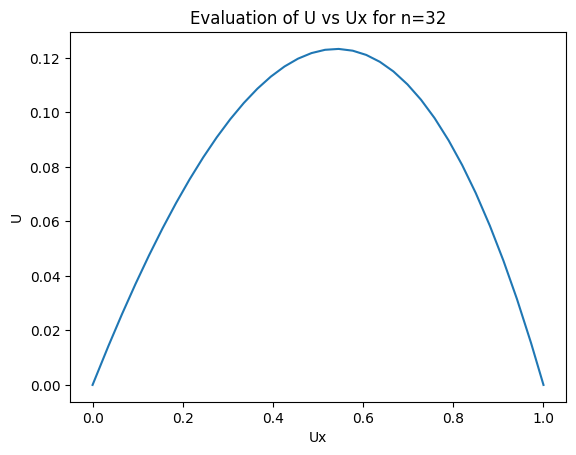

In [6]:
import MatGenerator as mg
n=32
A = mg.generateA(n,1.)
B = mg.generateB(n)
import GMRES as GM
from importlib import reload
reload(GM)
import numpy as np

alg = GM.gmres()
x0 = np.zeros((n,1))
x0[5,0] = 1
x = alg.mygmres(n,B, x0,n,np.eye(n),A)
err = alg.errors
n=[2**(i+1) for i in range(len(err))]

import matplotlib.pyplot as plt
plt.figure()
plt.loglog(n,err)
plt.title("Evaluation of U at n=32")
plt.xlabel("Corresponing N Values")
plt.ylabel("Error")

plt.figure()
x,y = alg.sol_to_xy()
plt.plot(x,y)
plt.title("Evaluation of U vs Ux for n=32")
plt.xlabel("Ux")
plt.ylabel("U")

Text(0, 0.5, 'U')

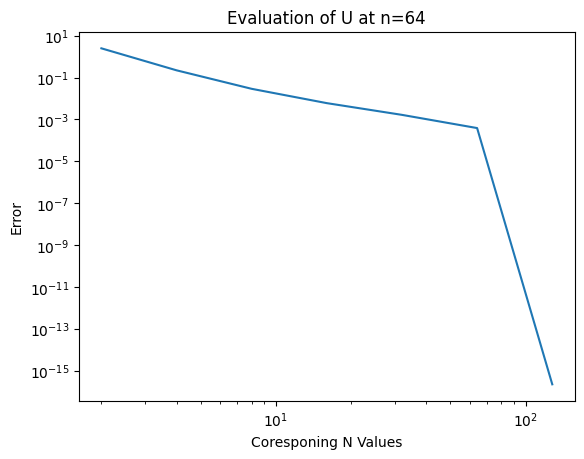

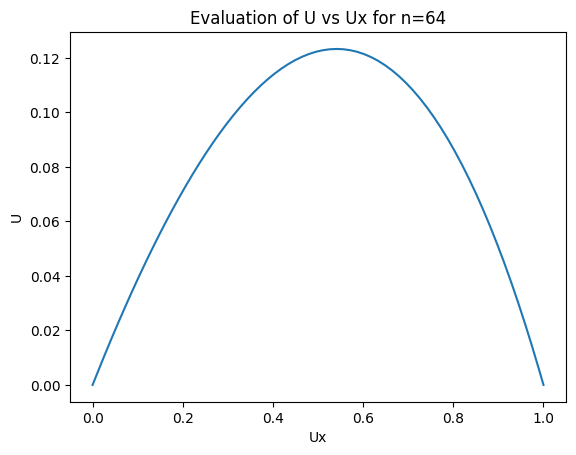

In [8]:
import MatGenerator as mg
n=64
A = mg.generateA(n,1.)
B = mg.generateB(n)
import GMRES as GM
from importlib import reload
reload(GM)
import numpy as np

alg = GM.gmres()
x0 = np.zeros((n,1))
x0[5,0] = 1
x = alg.mygmres(n,B, x0,n,np.eye(n),A)
err = alg.errors
n=[2**(i+1) for i in range(len(err))]

import matplotlib.pyplot as plt
plt.figure()
plt.loglog(n,err)
plt.title("Evaluation of U at n=64")
plt.xlabel("Corresponing N Values")
plt.ylabel("Error")


plt.figure()
x,y = alg.sol_to_xy()
plt.plot(x,y)
plt.title("Evaluation of U vs Ux for n=64")
plt.xlabel("Ux")
plt.ylabel("U")


Text(0, 0.5, 'U')

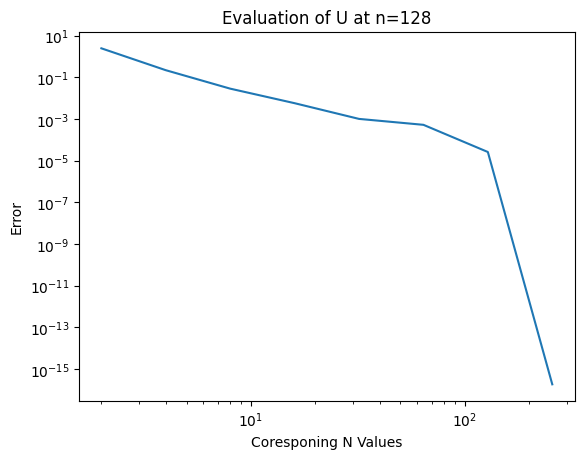

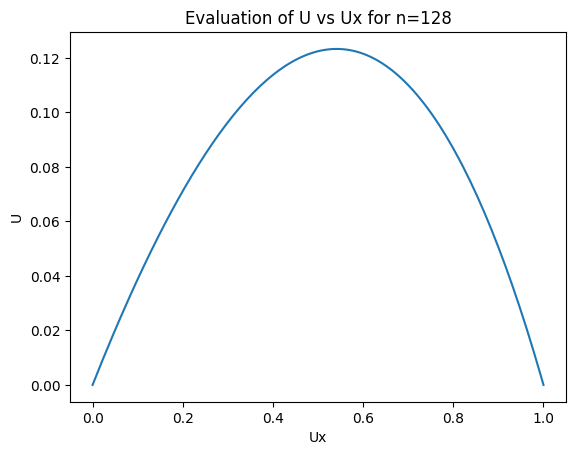

In [9]:
import MatGenerator as mg
n=128
A = mg.generateA(n,1.)
B = mg.generateB(n)
import GMRES as GM
from importlib import reload
reload(GM)
import numpy as np

alg = GM.gmres()
x0 = np.zeros((n,1))
x0[5,0] = 1
x = alg.mygmres(n,B, x0,n,np.eye(n),A)
err = alg.errors
n=[2**(i+1) for i in range(len(err))]

import matplotlib.pyplot as plt
plt.figure()
plt.loglog(n,err)
plt.title("Evaluation of U at n=128")
plt.xlabel("Corresponing N Values")
plt.ylabel("Error")

plt.figure()
x,y = alg.sol_to_xy()
plt.plot(x,y)
plt.title("Evaluation of U vs Ux for n=128")
plt.xlabel("Ux")
plt.ylabel("U")


Question 4 Preconditioning GMRES <br> 	Now consider a preconditioned version of the problem: $\tilde{A}*x=\tilde{b}$ Where:
$$\tilde{A}=A_{1}^{-1}*A$$
$$\tilde{b}=A_{1}^{-1}*b$$
$$M=A_{1}$$

<br> Here, $A_{1}$ is known as a preconditioning matrix and is used to speed up the convergence or improve the accuracy of solution methods.

<br>B:  Argue that $\tilde{A}$ and $\tilde{b}$  can be calculated efficiently, even though they formally involve a matrix inverse.  (This is a requirement for a preconditioning matrix to be useful.)

<br>C:Repeat problem 3 for the preconditioned version of the problem. 

<br>D: How quickly does the convergence rate for your GMRES algorithm compare with that in problem 3?  Why?  (Hint: Consider the condition number of the two problems.)

In [13]:
import MatGenerator as mg
import numpy as np
import scipy as sp
from importlib import reload
import warnings
reload(mg)

warnings.filterwarnings("ignore", category=sp.sparse.SparseEfficiencyWarning)

n_values = [16, 32, 64, 128]

#Condition numbers for matrix A for the FEM problem
for n in n_values:
    A = mg.generateA(n, 1.).toarray()
    condition_num = np.linalg.cond(A)
    print(f"FEM Condition number for n={n}: {condition_num}")
print()
#Condition numbers for matrix A tilda for the preconditioned problem
for n in n_values:
    A = mg.generateA(n,1.)
    A1lu =sp.sparse.linalg.spilu(A)
    A1i = A1lu.solve(np.eye(n))
    ATilda = A1i@A
    condition_num = np.linalg.cond(ATilda)
    print(f"Preconditioned Condition number for n={n}: {condition_num}")

FEM Condition number for n=16: 114.7320494923176
FEM Condition number for n=32: 434.0469748112428
FEM Condition number for n=64: 1685.7630064508082
FEM Condition number for n=128: 6641.537110398099

Preconditioned Condition number for n=16: 1.0000000000000024
Preconditioned Condition number for n=32: 1.0000000000000493
Preconditioned Condition number for n=64: 1.0000000000002016
Preconditioned Condition number for n=128: 1.0000000000014495


For the finite element method, we see a rapid degeneration of the matrix A as n increases. For the preconditioned method, the condition number of matrix A is about as far away as you can get from being singular and only slightly increases as n gets bigger.

Text(0, 0.5, 'U')

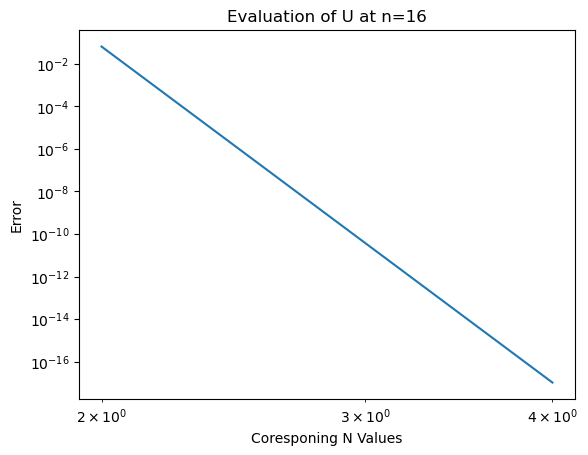

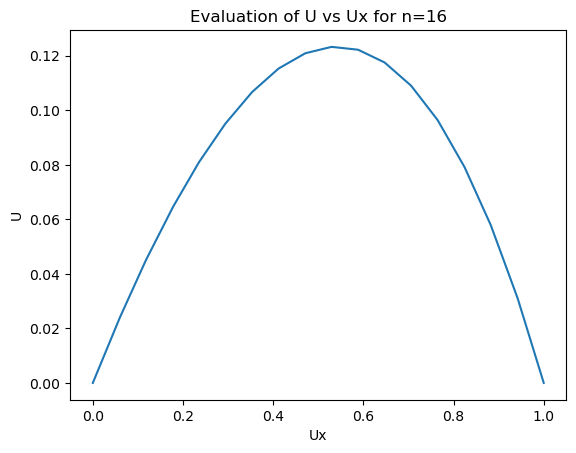

In [31]:
#Question4 Atilda = A*A_1^{-1}
import MatGenerator as mg
import scipy as sp 
reload(mg)
n=16
A = mg.generateA(n,1.)
A1lu =sp.sparse.linalg.spilu(A)
A1i = A1lu.solve(np.eye(n))
ATilda = A1i@A
B = mg.generateB(n)
Btilda =A1i@B 
import GMRES as GM
from importlib import reload
reload(GM)
import numpy as np

alg = GM.gmres()
x0 = np.zeros((n,1))
x0[0,0] = 1
x = alg.mygmres(n,Btilda, x0,n, np.eye(n),ATilda)
err = alg.errors
n=[2**(i+1) for i in range(len(err))]
import matplotlib.pyplot as plt
plt.figure()
plt.loglog(n,err)
# print(alg.best_x)
plt.title("Evaluation of U at n=16")
plt.xlabel("Coresponing N Values")
plt.ylabel("Error")

plt.figure()
x,y = alg.sol_to_xy()
plt.plot(x,y)
plt.title("Evaluation of U vs Ux for n=16")
plt.xlabel("Ux")
plt.ylabel("U")